https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

In [21]:
import pandas as pd
import numpy as np

columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
cars = pd.read_table("auto-mpg.data.txt", delim_whitespace=True, names=columns)
print(cars.head(5))

   mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0   18          8           307      130.0    3504          12.0          70   
1   15          8           350      165.0    3693          11.5          70   
2   18          8           318      150.0    3436          11.0          70   
3   16          8           304      150.0    3433          12.0          70   
4   17          8           302      140.0    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


Dependent variable: fuel efficiency,
Independent variables: other columns 

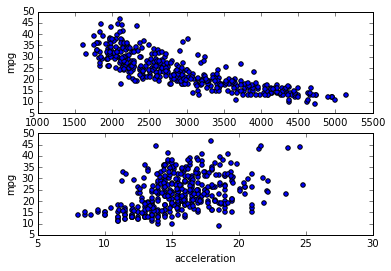

In [22]:
#Exploratory data analysis
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
cars.plot("weight", "mpg", kind='scatter', ax=ax1)
cars.plot("acceleration", "mpg", kind='scatter', ax=ax2)
plt.show()

Plots show:
Weak positive relation between acceleration and mpg;
Strong naegative relation between weight and mpg

In [23]:
# Single NumPy array (398 elements).
print(cars["weight"].values)
# NumPy matrix (398 rows by 1 column).
print(cars[["weight"]].values)

[ 3504.  3693.  3436.  3433.  3449.  4341.  4354.  4312.  4425.  3850.
  3563.  3609.  3761.  3086.  2372.  2833.  2774.  2587.  2130.  1835.
  2672.  2430.  2375.  2234.  2648.  4615.  4376.  4382.  4732.  2130.
  2264.  2228.  2046.  2634.  3439.  3329.  3302.  3288.  4209.  4464.
  4154.  4096.  4955.  4746.  5140.  2962.  2408.  3282.  3139.  2220.
  2123.  2074.  2065.  1773.  1613.  1834.  1955.  2278.  2126.  2254.
  2408.  2226.  4274.  4385.  4135.  4129.  3672.  4633.  4502.  4456.
  4422.  2330.  3892.  4098.  4294.  4077.  2933.  2511.  2979.  2189.
  2395.  2288.  2506.  2164.  2100.  4100.  3672.  3988.  4042.  3777.
  4952.  4464.  4363.  4237.  4735.  4951.  3821.  3121.  3278.  2945.
  3021.  2904.  1950.  4997.  4906.  4654.  4499.  2789.  2279.  2401.
  2379.  2124.  2310.  2472.  2265.  4082.  4278.  1867.  2158.  2582.
  2868.  3399.  2660.  2807.  3664.  3102.  2875.  2901.  3336.  1950.
  2451.  1836.  2542.  3781.  3632.  3613.  4141.  4699.  4457.  4638.
  4257

In [24]:
import sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(cars[["weight"]], cars[["mpg"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now, using the above model to make predictions:

In [25]:
predictions = lr.predict(cars[["weight"]])

#Comparing results using a few points
print(predictions[0:5])
print(cars["mpg"][0:5])

[[ 19.41852276]
 [ 17.96764345]
 [ 19.94053224]
 [ 19.96356207]
 [ 19.84073631]]
0    18
1    15
2    18
3    16
4    17
Name: mpg, dtype: float64


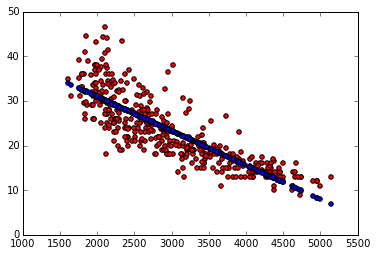

In [26]:
#Visualizing the comparisons
plt.scatter(cars["weight"], cars["mpg"], c='red')
plt.scatter(cars["weight"], predictions, c='blue')

For more quantitative understanding of model's efficiency, calculating error. 

MEAN SQUARED ERROR:

In [27]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(cars["mpg"], predictions)
print(mse)

18.7809397346


ROOT MEAN SQUARED ERROR

In [28]:
#Check - 4.33369815915
mse = mean_squared_error(cars["mpg"], predictions)
rmse = mse ** (1/2)
print(rmse)

1.0


In [29]:
#Now working with the horsepower

filtered_cars = cars[cars['horsepower'] != '?']
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')

C:\Users\Swapnil Kant Neeraj\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


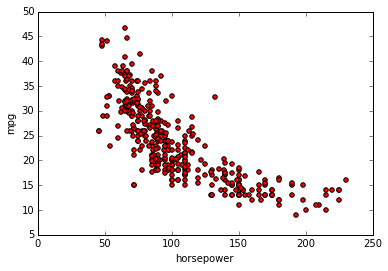

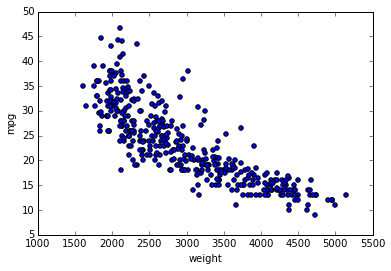

In [30]:
filtered_cars.plot("horsepower", "mpg", kind='scatter', c='red')
filtered_cars.plot("weight", "mpg", kind='scatter', c='blue')
plt.show()

In [31]:
lr_hp = LinearRegression()
lr_hp.fit(filtered_cars[["horsepower"]], filtered_cars["mpg"])
predictions = lr_hp.predict(filtered_cars[["horsepower"]])
print(predictions[0:5])
print(filtered_cars["mpg"][0:5].values)

[ 19.41604569  13.89148002  16.25915102  16.25915102  17.83759835]
[ 18.  15.  18.  16.  17.]


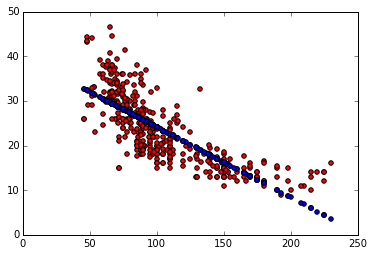

In [32]:
plt.scatter(filtered_cars["horsepower"], filtered_cars["mpg"], c='red')
plt.scatter(filtered_cars["horsepower"], predictions, c='blue')

In [33]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(filtered_cars["mpg"], predictions)
print(mse)

rmse = mse ** (1/2)
print(rmse)

23.9436629386
1.0


##Multiclass classification

In [34]:
cars = pd.read_csv("auto.csv")

In [35]:
unique_origions = cars["origin"].unique()
print unique_origions

[1 3 2]


In [36]:
cars["cylinders"].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [37]:
#Adding dummy variables to generate categorical values and dropping the original columns

dummy_cylinders = pd.get_dummies(cars["cylinders"], prefix="cyl")
cars = pd.concat([cars, dummy_cylinders], axis=1)

dummy_years = pd.get_dummies(cars["year"], prefix="year")
cars = pd.concat([cars, dummy_years], axis=1)

cars = cars.drop("year", axis=1)
cars = cars.drop("cylinders", axis=1)
print(cars.head())

   mpg  displacement horsepower  weight  acceleration  origin  \
0   18           307        130    3504          12.0       1   
1   15           350        165    3693          11.5       1   
2   18           318        150    3436          11.0       1   
3   16           304        150    3433          12.0       1   
4   17           302        140    3449          10.5       1   

                    car_name  cyl_3  cyl_4  cyl_5   ...     year_73  year_74  \
0  chevrolet chevelle malibu      0      0      0   ...           0        0   
1          buick skylark 320      0      0      0   ...           0        0   
2         plymouth satellite      0      0      0   ...           0        0   
3              amc rebel sst      0      0      0   ...           0        0   
4                ford torino      0      0      0   ...           0        0   

   year_75  year_76  year_77  year_78  year_79  year_80  year_81  year_82  
0        0        0        0        0        0      

In [38]:
#Randomizing the rows before splitting into test and train.
shuffled_rows = np.random.permutation(cars.index)
shuffled_cars = cars.iloc[shuffled_rows]

In [39]:
#Split into train and test sets (70:30) 
highest_train_row = int(cars.shape[0] * .70)
train = shuffled_cars.iloc[0:highest_train_row]
test = shuffled_cars.iloc[highest_train_row:]

In [42]:
#to find the number of rows
cars.shape[0]

398

In [43]:
unique_origins = cars["origin"].unique()
unique_origins.sort()

In [46]:
from sklearn.linear_model import LogisticRegression

#creating a dictionary which maps origin->relevant Logistic Reg model instance
models = {}

#For each value in unique_origins, train a logistic regression model with the 
#following parameters:
#X: Dataframe containing just the cylinder & year binary columns.
#y: list (or Series) of Boolean values:True if observation's value for origin 
#matches the current iterator variable./False if observation's value for origin 
#doesn't match the current iterator variable.

features = [c for c in train.columns if c.startswith("cyl") or c.startswith("year")]

for origin in unique_origins:
    model = LogisticRegression()
    
    X_train = train[features]
    y_train = train["origin"] == origin

    model.fit(X_train, y_train)
    models[origin] = model

In [47]:
#For each origin value from unique_origins: Use the LogisticRegression 
#predict_proba function to return the 3 lists of predicted probabilities for 
#the test set and add to the testing_probs Dataframe.

testing_probs = pd.DataFrame(columns=unique_origins)

for origin in unique_origins:
    # Select testing features.
    X_test = test[features]   
    # Compute probability of observation being in the origin.
    testing_probs[origin] = models[origin].predict_proba(X_test)[:,1]

Now that we trained the models and computed the probabilities in each origin
we can classify each observation.

In [ ]:
#To classify each observation we want to select the origin with the highest 
#probability of classification for that observation. While each column in our 
#dataframe testing_probs represents an origin we just need to choose the one 
#with the largest probability.


#Classify each observation in the test set using the testing_probs Dataframe.

predicted_origins = testing_probs.idxmax(axis=1)
print(predicted_origins)

#the Dataframe method .idxmax() to return a Series where each value corresponds
#to the column or where the maximum value occurs for that observation. We
#need to make sure to set the axis paramater to 1 since we want to calculate
#the maximum value across columns. Since each column maps directly to an
#origin the resulting Series will be the classification from our model.

#Overfitting

In [29]:
import pandas as pd
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]

cars = pd.read_table("auto-mpg.data.txt", delim_whitespace=True, names=columns)

filtered_cars = cars[cars['horsepower'] != '?']
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')

C:\Users\Swapnil Kant Neeraj\Anaconda\lib\site-packages\IPython\kernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [31]:
filtered_cars.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15,8,350,165,3693,11.5,70,1,buick skylark 320


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Creating a function that takes in col names and trains a linear reg using cols as the features and mpg as target. The function uses the trained model to make predictions using the same input it was trained on; Computes the variance of the predicted values and the mse between the predicted values and the actual label (mpg column). Function returns mse,variance.
def train_and_test(cols):
    
    # Split into features & target.
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    
    # Fit model.
    lr = LinearRegression()
    lr.fit(features, target)
    
    # Make predictions on training set.
    predictions = lr.predict(features)
    
    # Compute MSE and Variance.
    mse = mean_squared_error(filtered_cars["mpg"], predictions)
    variance = np.var(predictions)
    return(mse, variance)
    
cyl_mse, cyl_var = train_and_test(["cylinders"])
weight_mse, weight_var = train_and_test(["weight"])

In [33]:
one_mse, one_var = train_and_test(["cylinders"])
two_mse, two_var = train_and_test(["cylinders", "displacement"])
three_mse, three_var = train_and_test(["cylinders", "displacement", "horsepower"])
four_mse, four_var = train_and_test(["cylinders", "displacement", "horsepower", "weight"])
five_mse, five_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
six_mse, six_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
seven_mse, seven_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])

In [34]:
#new function to handle performing the cross validation and computing the cross validation error.
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

def train_and_cross_val(cols):
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    
    variance_values = []
    mse_values = []
    
    # KFold instance. Using a KFold class to perform 10-fold validation 
    kf = KFold(n=len(filtered_cars), n_folds=10, shuffle=True, random_state=3)
    
    # Iterate through over each fold.
    for train_index, test_index in kf:
        # Training and test sets.
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        
        # Fit the model and make predictions.
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        predictions = lr.predict(X_test)
        
        # Calculate mse and variance values for this fold.
        mse = mean_squared_error(y_test, predictions)
        var = np.var(predictions)

        # Append to arrays to do calculate overall average mse and variance values.
        variance_values.append(var)
        mse_values.append(mse)
   
    # Compute average mse and variance values.
    avg_mse = np.mean(mse_values)
    avg_var = np.mean(variance_values)
    return(avg_mse, avg_var)
        
two_mse, two_var = train_and_cross_val(["cylinders", "displacement"])
three_mse, three_var = train_and_cross_val(["cylinders", "displacement", "horsepower"])
four_mse, four_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight"])
five_mse, five_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
six_mse, six_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
seven_mse, seven_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])

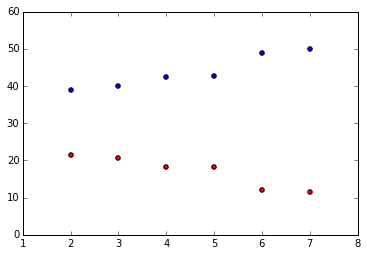

In [35]:
#model's number of features on the x-axis and the model's overall, cross-validation mean squared error on the y-axis
plt.scatter([2,3,4,5,6,7], [two_mse, three_mse, four_mse, five_mse, six_mse, seven_mse], c='red')

#model's number of features on the x-axis and the model's overall, cross-validation variance on the y-axis
plt.scatter([2,3,4,5,6,7], [two_var, three_var, four_var, five_var, six_var, seven_var], c='blue')
plt.show()

While the higher order multivariate models overfit in relation to the lower order multivariate models, the in-sample error and out-of-sample didn't deviate by much. The best model was around 50% more accurate than the simplest model. On the other hand, the overall variance increased around 25% as we increased the model complexity. 

The increased variance with the increased model complexity means that the model will have more unpredictable performance on truly new, unseen data.